<a href="https://colab.research.google.com/github/dedejenalirawan/PraktikumPCD/blob/main/PraktikumPCD_DedeJenalIrawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

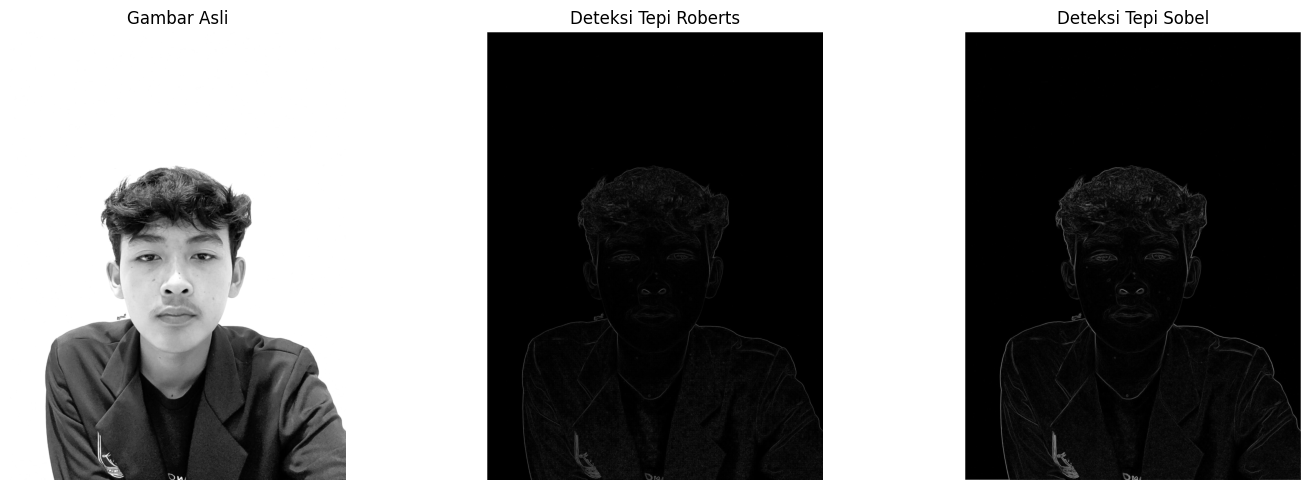

--- Analisis Deteksi Tepi Roberts ---
Rata-rata Intensitas: 0.021703919395804405
Intensitas Maksimum: 1.4142135381698608
Intensitas Minimum: 0.0
Standar Deviasi: 0.06850840151309967

--- Analisis Deteksi Tepi Sobel ---
Rata-rata Intensitas: 0.0886661484837532
Intensitas Maksimum: 4.242640495300293
Intensitas Minimum: 0.0
Standar Deviasi: 0.2663268744945526

--- Kesimpulan ---
Operator Roberts menghasilkan deteksi tepi yang lebih tajam tetapi lebih sensitif terhadap noise.
Operator Sobel menghasilkan hasil yang lebih halus dan lebih tahan terhadap noise.


In [5]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt
import os

# Fungsi untuk memuat gambar
def load_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"File gambar tidak ditemukan: {image_path}")
    image = imageio.imread(image_path, mode='F')  # Gunakan mode='F' untuk grayscale berbasis float
    return image / 255.0  # Normalisasi ke rentang [0, 1]

# Operator Roberts
def roberts_operator(image):
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    grad_x = convolve(image, kernel_x)
    grad_y = convolve(image, kernel_y)

    return np.sqrt(grad_x**2 + grad_y**2)

# Operator Sobel
def sobel_operator(image):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    grad_x = convolve(image, kernel_x)
    grad_y = convolve(image, kernel_y)

    return np.sqrt(grad_x**2 + grad_y**2)

# Fungsi konvolusi
def convolve(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    output = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_height // 2, kernel_height // 2),
                                  (kernel_width // 2, kernel_width // 2)), mode='constant', constant_values=0)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output

# Perbandingan dan analisis
def compare_edge_detection(image_path):
    try:
        image = load_image(image_path)
    except FileNotFoundError as e:
        print(e)
        return

    roberts_edges = roberts_operator(image)
    sobel_edges = sobel_operator(image)

    # Visualisasi
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Gambar Asli')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Deteksi Tepi Roberts')
    plt.imshow(roberts_edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Deteksi Tepi Sobel')
    plt.imshow(sobel_edges, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Analisis
    roberts_mean = np.mean(roberts_edges)
    sobel_mean = np.mean(sobel_edges)

    roberts_max = np.max(roberts_edges)
    sobel_max = np.max(sobel_edges)

    roberts_min = np.min(roberts_edges)
    sobel_min = np.min(sobel_edges)

    roberts_std = np.std(roberts_edges)
    sobel_std = np.std(sobel_edges)

    print("--- Analisis Deteksi Tepi Roberts ---")
    print(f"Rata-rata Intensitas: {roberts_mean}")
    print(f"Intensitas Maksimum: {roberts_max}")
    print(f"Intensitas Minimum: {roberts_min}")
    print(f"Standar Deviasi: {roberts_std}")

    print("\n--- Analisis Deteksi Tepi Sobel ---")
    print(f"Rata-rata Intensitas: {sobel_mean}")
    print(f"Intensitas Maksimum: {sobel_max}")
    print(f"Intensitas Minimum: {sobel_min}")
    print(f"Standar Deviasi: {sobel_std}")

    # Kesimpulan
    print("\n--- Kesimpulan ---")
    print("Operator Roberts menghasilkan deteksi tepi yang lebih tajam tetapi lebih sensitif terhadap noise.")
    print("Operator Sobel menghasilkan hasil yang lebih halus dan lebih tahan terhadap noise.")

compare_edge_detection('/content/IMG-20240509-WA0038.jpg')
